In [1]:
import numpy as np
import os

# PyToF Tutorial
This .ipynb file serves as a tutorial for the usage of the PyToF package. 

After a successful installation, the class $\texttt{ClassToF}$ can be imported via

In [2]:
from PyToF import ClassToF

It contains all functionalities of the PyToF package. To create a class instance, call

In [3]:
X = ClassToF.ToF()

/home/lumo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Not supplying any arguments just initialises the class with its standard parameters. The details are listed in the function $\texttt{\_default\_opts()}$ in the file $\texttt{ClassToF.py}$. In a nutshell, the standard parameters correspond to a 4th order Theory of Figures implementation, reasonable numerical parameters, and the physical properties of the planet Jupiter. Furthermore, the Bessel solutions for the gravitational moments $J_{n}$ of a single polytrope Jupiter model from $\textit{Wisdom \& Hubbard 2016}$ are saved in the default parameters. A few examples:

In [4]:
print('Order of the Theory of Figures to be used:          ', X.opts['order'])
print('Initial mass of the planet in SI units:             ', X.opts['M_init'])
print('Initial equatorial radius of the planet in SI units:', X.opts['R_init'])
print('Initial rotation period of the planet in SI units:  ', X.opts['Period'])
print('A few Wisdom & Hubbard 2016 Bessel values for J_n:  ', X.opts['Target_Js'][:4])

Order of the Theory of Figures to be used:           4
Initial mass of the planet in SI units:              1.8982532431065258e+27
Initial equatorial radius of the planet in SI units: 71492000
Initial rotation period of the planet in SI units:   35729.699778131784
A few Wisdom & Hubbard 2016 Bessel values for J_n:   [ 1.39885109e-02 -5.31828100e-04  3.01183229e-05 -2.13211571e-06]


This tutorial is divided up into the following chapters: 
 - $\textbf{Chapter 1}$ introduces basic functionalities using the example of a barotrope, a function that describes the pressure-density relation $\rho=\rho(P)$ within the planet.
 - $\textbf{Chapter 2}$ showcases a few built-in plotting functionalities provided by PyToF.
 - $\textbf{Chapter 3}$ explains how to use PyToF for an arbitrary planet and a user-provided density profile including a constraint the outermost part of the planet ("atmosphere").
 - $\textbf{Chapter 4}$ introduces how to find parameterized solutions of an arbitrary planet using a MCMC algorithm.
 - $\textbf{Chapter 5}$ showcases more built-in plotting functionalities relevant for the methods introduced in chapter 4.

## Chapter 1: Basic functionalities
Using the Jupiter single polytrope model by $\textit{Wisdom \& Hubbard 2016}$

We consider the simplest model, a single polytrope $\rho(P)=\sqrt{P/K}$, just like in $\textit{Wisdom \& Hubbard 2016}$, that describes the interior of the planet. Note that in the case of a single polytrope, the constant $K$ can be set to an arbitrary value, since the density is renormalised in each iteration to match the initially provided mass.

In [5]:
def barotrope(P, K): 
    return np.sqrt(P/K)
    
X.opts['baro_param_init'] = [1] #sets K=1
X.set_barotrope(barotrope)

After setting the barotrope function, we can call the Theory of Figures algorithm to find a self-consistent solution. For all the details, we refer to Appendix A in $\textit{Morf et al. 2024}$. In PyToF, this is done by calling $\texttt{X.relax\_to\_barotrope()}$:

In [6]:
number_of_iterations = X.relax_to_barotrope()
print('Number of iterations used by the algorithm:', number_of_iterations)

Number of iterations used by the algorithm: 44


We see how many iterations the algorithm needed to converge on a solution. Convergence is achieved when the gravitational moments $J_{n}$, the densities $\rho$, and the rotational parameter $m=\frac{(2\pi / P_\text{rot})^2 l_\text{max}^3}{GM}$ stop changing between iterations. $P_\text{rot}$ is the rotation period, $l_\text{max}$ is the Theory of Figures notation for the average radius of the outermost spheroid shell, $G$ is Newton's Constant, and $M$ is the mass of the planet. The relative tolerances that decide if convergence has been reached are

In [7]:
print('Relative tolerance in the iterative procedure for the Js:                  ', X.opts['dJ_tol'])
print('Relative tolerance in the iterative procedure for the rotational parameter:', X.opts['drot_tol'])
print('Relative tolerance in the iterative procedure for the densities:           ', X.opts['drho_tol'])

Relative tolerance in the iterative procedure for the Js:                   1e-10
Relative tolerance in the iterative procedure for the rotational parameter: 1e-10
Relative tolerance in the iterative procedure for the densities:            1e-10


Note that there is a maximal number of iterations to prevent unreasonable runtimes:

In [8]:
print('Default maximal number of iterations for a barotrope:', X.opts['MaxIterBar'])

Default maximal number of iterations for a barotrope: 100


Exceeding the maximum number of iterations will result in a warning message. We can use $\texttt{X.\_set\_IC()}$ to clear all previously calculated values and redo the calculation and force fewer iterations to see the warnign message.

In [9]:
X.opts['MaxIterBar'] = number_of_iterations-5
print('New maximal number of iterations for a barotrope:', X.opts['MaxIterBar'])

X._set_IC()
number_of_iterations = X.relax_to_barotrope()

X.opts['MaxIterBar'] = 100

New maximal number of iterations for a barotrope: 39

Convergence warning: drot_tol = 2e-13 < 1e-10, dJ_tol = 6e-11 < 1e-10, drho_tol = 2e-09 > 1e-10 after MaxIterBar = 39 iterations.


We can control how much information is provided by PyToF with the verbosity option. $0$ corresponds to no console output, $1$ and $2$ are intermediate options, $3$ can result in a lot of console output.

In [10]:
print('Default verbosity:', X.opts['verbosity'])
X.opts['verbosity'] = 3
print('New verbosity:    ', X.opts['verbosity'])

X._set_IC()
number_of_iterations = X.relax_to_barotrope()

X.opts['verbosity'] = 0

Default verbosity: 0
New verbosity:     3
Convergence warning: max(dJs) = 8e+13 > 1e-10 after maxiter = 2 iterations.
Relaxing to hydrostatic equilibrium done in 1.18e-02 seconds.
Convergence warning: max(dJs) = 1e+00 > 1e-10 after maxiter = 2 iterations.
Relaxing to hydrostatic equilibrium done in 1.35e-02 seconds.
Convergence warning: max(dJs) = 6e-02 > 1e-10 after maxiter = 2 iterations.
Relaxing to hydrostatic equilibrium done in 2.04e-02 seconds.
Convergence warning: max(dJs) = 1e-01 > 1e-10 after maxiter = 2 iterations.
Relaxing to hydrostatic equilibrium done in 1.06e-02 seconds.
Convergence warning: max(dJs) = 1e-01 > 1e-10 after maxiter = 2 iterations.
Relaxing to hydrostatic equilibrium done in 1.09e-02 seconds.
Convergence warning: max(dJs) = 6e-02 > 1e-10 after maxiter = 2 iterations.
Relaxing to hydrostatic equilibrium done in 1.21e-02 seconds.
Convergence warning: max(dJs) = 4e-02 > 1e-10 after maxiter = 2 iterations.
Relaxing to hydrostatic equilibrium done in 3.40e-02 s

The gravitational moments calculated are saved in $\texttt{X.Js}$ and can be compared to the values of $\textit{Wisdom \& Hubbard 2016}$ stored in $\texttt{X.opts['Target\_Js']}$:

In [11]:
print('PyToF solutions:        ', ['J_'+str(2*i)  +' = '+"{:.4e}".format(X.Js[i])                for i in range(1,5)])
print('W&H 16 Bessel solutions:', ['J_'+str(2*i+2)+' = '+"{:.4e}".format(X.opts['Target_Js'][i]) for i in range(4)])

PyToF solutions:         ['J_2 = 1.3989e-02', 'J_4 = -5.3198e-04', 'J_6 = 2.9862e-05', 'J_8 = -2.3365e-06']
W&H 16 Bessel solutions: ['J_2 = 1.3989e-02', 'J_4 = -5.3183e-04', 'J_6 = 3.0118e-05', 'J_8 = -2.1321e-06']


The PyToF numbers can be improved by either going to a higher number of layers:

In [12]:
print('Default number of layers:', X.opts['N'])
X.opts['N'] = 2**12
print('New number of layers:    ', X.opts['N'])

X._set_IC()
number_of_iterations = X.relax_to_barotrope()

print('PyToF solutions:        ', ['J_'+str(2*i)  +' = '+"{:.4e}".format(X.Js[i])                for i in range(1,5)])
print('W&H 16 Bessel solutions:', ['J_'+str(2*i+2)+' = '+"{:.4e}".format(X.opts['Target_Js'][i]) for i in range(4)])

X.opts['N'] = 2**10

Default number of layers: 1024
New number of layers:     4096
PyToF solutions:         ['J_2 = 1.3988e-02', 'J_4 = -5.3196e-04', 'J_6 = 2.9860e-05', 'J_8 = -2.3359e-06']
W&H 16 Bessel solutions: ['J_2 = 1.3989e-02', 'J_4 = -5.3183e-04', 'J_6 = 3.0118e-05', 'J_8 = -2.1321e-06']


Or even better, going to a higher order of the Theory of Figures (either 7th oder 10th order):

In [13]:
print('Default ToF order:', X.opts['order'])
X.opts['order'] = 10
print('New ToF order:    ', X.opts['order'])

X._set_IC()
number_of_iterations = X.relax_to_barotrope()

print('PyToF solutions:        ', ['J_'+str(2*i)  +' = '+"{:.4e}".format(X.Js[i])                for i in range(1,5)])
print('W&H 16 Bessel solutions:', ['J_'+str(2*i+2)+' = '+"{:.4e}".format(X.opts['Target_Js'][i]) for i in range(4)])

X.opts['order'] = 4

Default ToF order: 4
New ToF order:     10
PyToF solutions:         ['J_2 = 1.3989e-02', 'J_4 = -5.3185e-04', 'J_6 = 3.0120e-05', 'J_8 = -2.1323e-06']
W&H 16 Bessel solutions: ['J_2 = 1.3989e-02', 'J_4 = -5.3183e-04', 'J_6 = 3.0118e-05', 'J_8 = -2.1321e-06']


For an overview of accuracy and convergence, see the file $\texttt{PyToF\_Accuracy\_and\_Convergence.ipynb}$.

The calculated average radii $l_i$ of a spheroid shell, their densities $\rho_i$, and their pressures $P_i$ ($i \in \{ 1, \dots, \texttt{X.opts['N']} \}$) can be accessed via $\texttt{X.li, X.rhoi, X.Pi}$. To get the 2D spheroid coordinates $r=r_{l_i}(\mu)$ of a shell with density $\rho_i$, pressure $P_i$, and $\mu = \cos\vartheta$ being the cosine of the colatitude, one can call $\texttt{X.get\_r\_l\_mu()}$. The normalized moment of inertia $I/(Ml_\text{max}^2)$ can be calculated with $\texttt{X.get\_NMoI()}$.

In [14]:
print('Shape of the average radii, densities, and pressure arrays:', np.shape(X.li), np.shape(X.rhoi), np.shape(X.Pi))

mu = np.cos(np.linspace(0, np.pi, 180))
print('Shape of the 2D coordinates of the spheroids:              ', np.shape(X.get_r_l_mu(mu)))

print('NMoI:                                                      ', "{:.4f}".format(X.get_NMoI()))

Shape of the average radii, densities, and pressure arrays: (1024,) (1024,) (1024,)
Shape of the 2D coordinates of the spheroids:               (1024, 180)
NMoI:                                                       0.2674


## Chapter 2: Built-in plotting functionalities I
Using the Jupiter single polytrope model by $\textit{Wisdom \& Hubbard 2016}$

PyToF provides the functions $\texttt{X.plot\_xy(), X.plot\_shape(), X.plot\_ss()}$ (and more) for plotting. The default plotting options are listed in the function $\texttt{default\_opts()}$ in the file $\texttt{PlotToF.py}$. The function $\texttt{X.plot\_xy()}$ needs two integer numbers $x,y \in \{0,1,2,3\}$ as arguments that correspond to 

 - 0: Average normalized radii of the spheroid shells
 - 1: Mass enclosed by the spheroid shells
 - 2: Densities of the spheroid shells
 - 3: Pressures of the spheroid shells

Therefore to plot e.g. the densities of the spheroid shells as a function of the average normalized radii of the spheroid shells, we call:

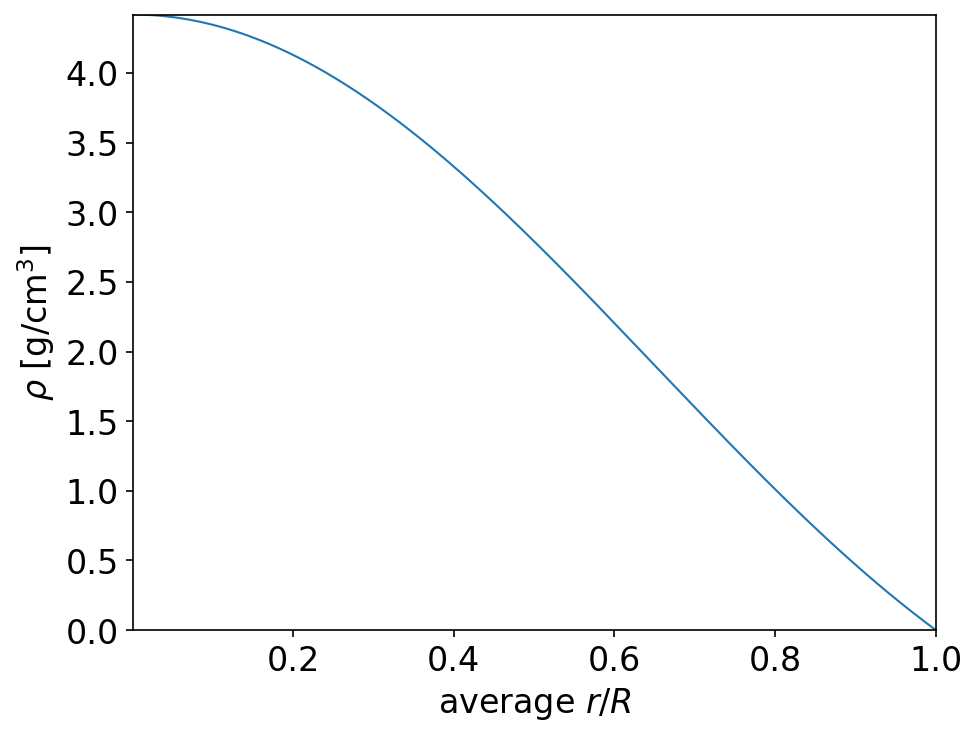

In [15]:
X.plot_xy(0,2)

We now provide an example with all custom plotting options. Most keywords are borrowed from $\texttt{matplotlib}$. In particular, we can plot additional data when $\texttt{X.plot\_xy()}$ is provided with a class $\texttt{literature}$ of the form:

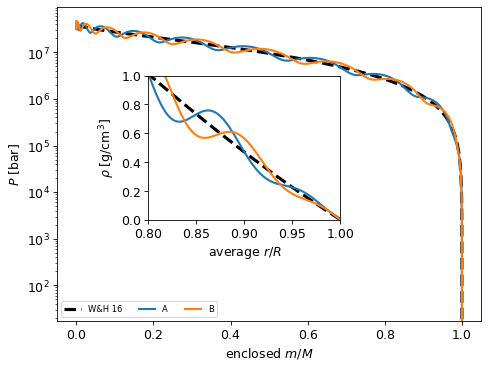

In [16]:
factorA = (1+0.2*np.sin(np.linspace(0,20*np.pi,X.opts['N']))) #meaningless factor to create new data
factorB = (1+0.2*np.cos(np.linspace(0,20*np.pi,X.opts['N']))) #meaningless factor to create new data

class literature():
    
    lis    = [X.li,           X.li]
    rhois  = [X.rhoi*factorA, X.rhoi*factorB]
    Pis    = [X.Pi*factorA,   X.Pi*factorB]
    
    labels = ['A', 'B']
    colors = ['C0', 'C1']
    lws    = [2, 2]
    lss    = ['-', '-']

X.plot_xy(1,3,
          xmargin=0.05, ymargin=0.05,
          lw=3, ls='--', color='black', label='W&H 16', 
          literature=literature, plot_literature=True,
          extra_plot=True, extra_coord=[0.3, 0.4, 0.4, 0.4], e_x=0, e_y=2, extra_lim=[[0.8,1],[0,1]], 
          legend=True, legend_loc='lower left', legend_ncol=3, legend_fontsize=8, legend_framealpha=1.0,
          dpi=75, fontsize=12, 
          save=True, path_name=os.getcwd(), fig_name='custom_plot', format='pdf', transparent=False)

The function $\texttt{X.plot\_shape()}$ does not need any arguments and returns two plots illustrating the shape of the planet.

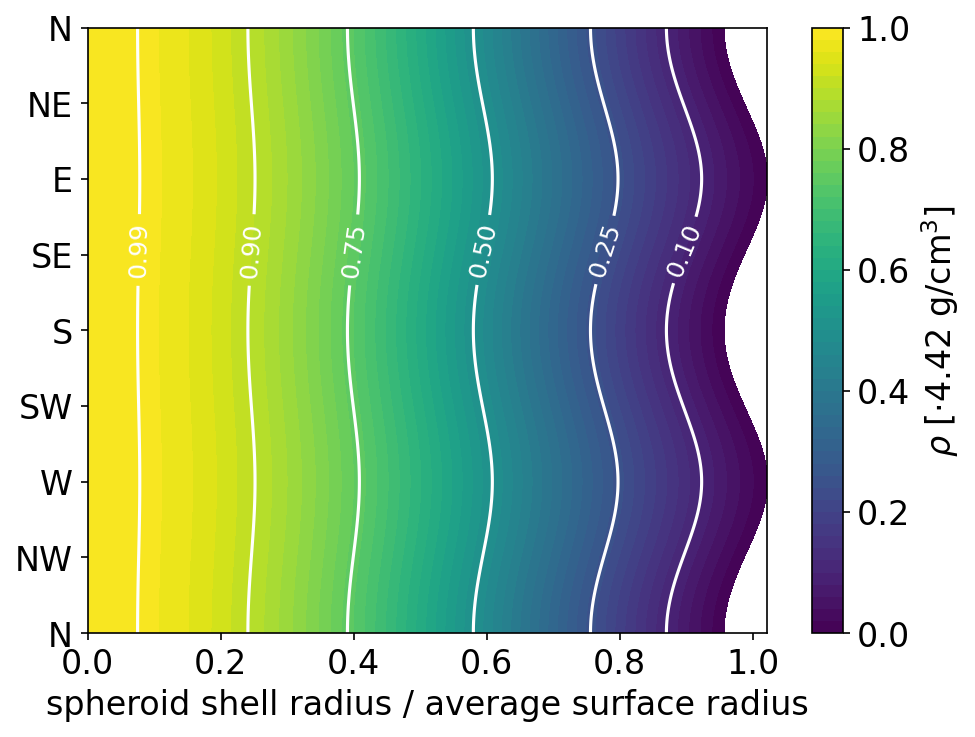

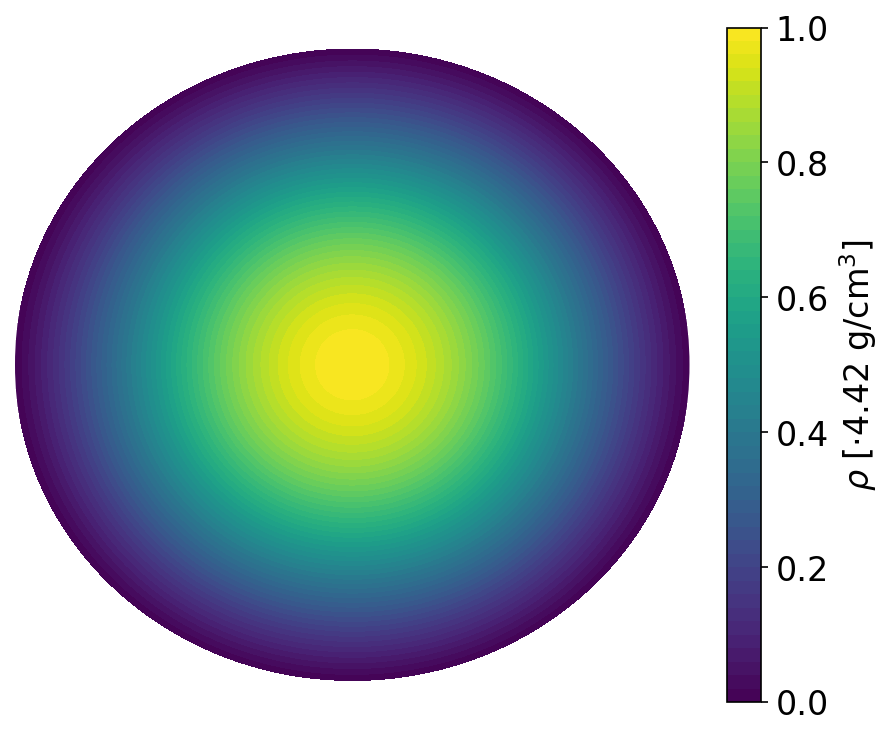

In [17]:
X.plot_shape()

We now provide an example with all custom plotting options. Some keywords are borrowed from $\texttt{matplotlib}$.

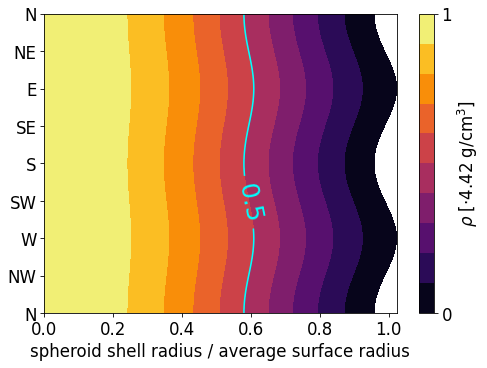

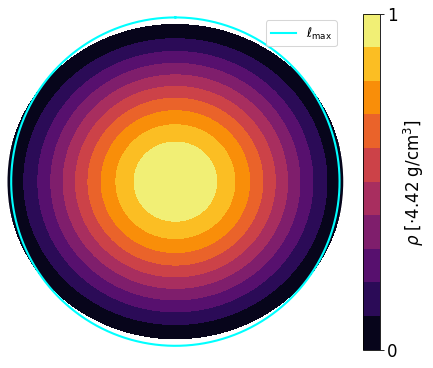

In [18]:
X.plot_shape(contourf_levels=10, contourf_cmap='inferno', 
             contour_levels=[0.5], contour_colors='cyan', contour_fontsize=24, 
             colorbar_ticks=[0, 1.0],
             shape_circle=True,
             shape_circle_lw=2, shape_circle_ls='-',shape_circle_color='cyan', shape_circle_label=r'$\ell_\text{max}$',
             legend=True, legend_loc='upper right',
             dpi=75)

The function $\texttt{X.plot\_ss()}$ does not need any arguments and returns one plots displaying the figure functions of the planet.

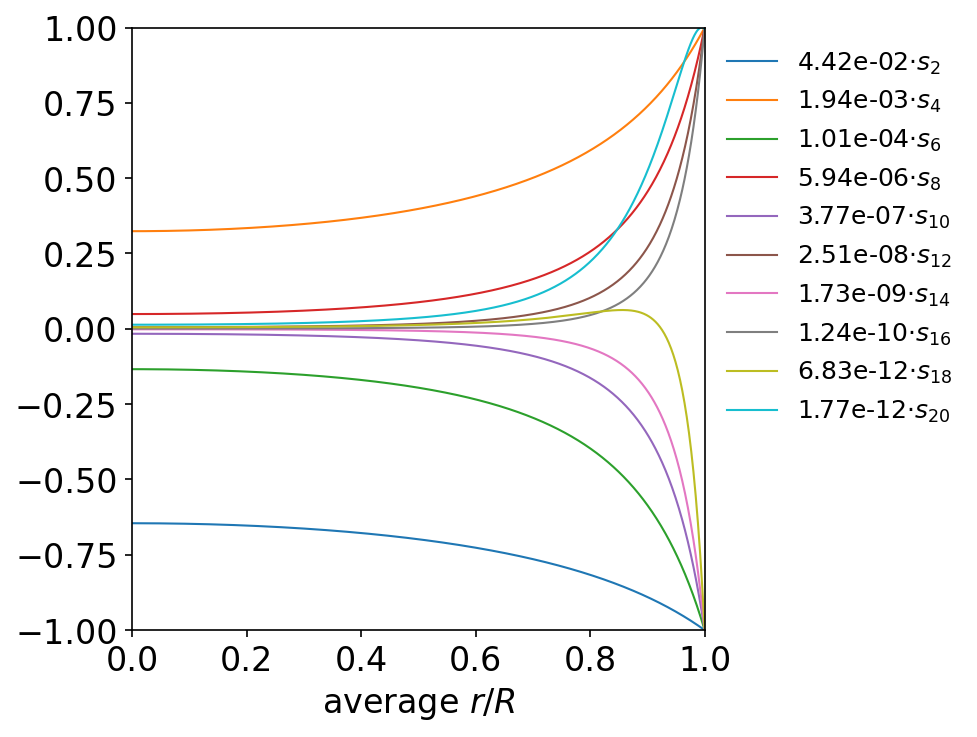

In [19]:
X.plot_ss()

There are no new custom plotting options. 

## Chapter 3: Advanced functionalities I
Using a custom density profile of an arbitrary planet

Instead of using a polytrope like in chapter 1, we might also want to provide a density profile directly:

In [20]:
N         = 2**10
density   = 1000 #kg/m^3
densities = density*np.ones(N) 
radius    = 1e6 #m
radii     = radius*np.logspace(0, -1, N)                 #note that all arrays start with the outermost part of the planet
mass      = -4*np.pi*np.trapz(densities*radii**2, radii) #negative sign because beginning of the array is the outer surface
period    = 24*60*60 #s

X = ClassToF.ToF(N=N, M_init=mass, R_init=radius, Period=period)

In this case we have to provide the radii, densities, and the rotational parameter $m=\frac{(2\pi / P_\text{rot})^2 l_\text{max}^3}{GM}$ directly to the class and can then relax to hydrostatic equilibrium via $\texttt{relax\_to\_HE()}$.

Number of iterations used by the algorithm: 49
PyToF solutions: ['J_2 = 9.4052e-03', 'J_4 = -1.8937e-04', 'J_6 = 4.9361e-06', 'J_8 = -1.5397e-07']


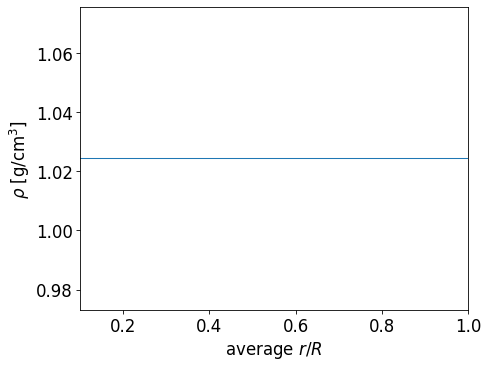

In [21]:
X.li         = radii
X.rhoi       = densities
X.m_rot_calc = (2*np.pi/period)**2*X.li[0]**3/(X.opts['G']*mass)
X.opts['MaxIterHE'] = 100 #Note that the default is only X.opts['MaxIterHE'] = 2, if relax_to_HE() is called directly, one should increase this number.
number_of_iterations = X.relax_to_HE()
print('Number of iterations used by the algorithm:', number_of_iterations)

X.plot_xy(0,2, dpi=75)
print('PyToF solutions:', ['J_'+str(2*i)  +' = '+"{:.4e}".format(X.Js[i]) for i in range(1,5)])

Note that the density has been slightly adjusted due to the rotation of the planet. Setting $\texttt{period=np.infty}$ yields a density of 1 g/cm$^3$ as expected and gravitational moments $J_n$ that are zero. 

We can also define a function that parameterises the density profile.

PyToF solutions: ['J_2 = 4.0653e-03', 'J_4 = -4.1474e-05', 'J_6 = 6.0319e-07', 'J_8 = -1.0966e-08']


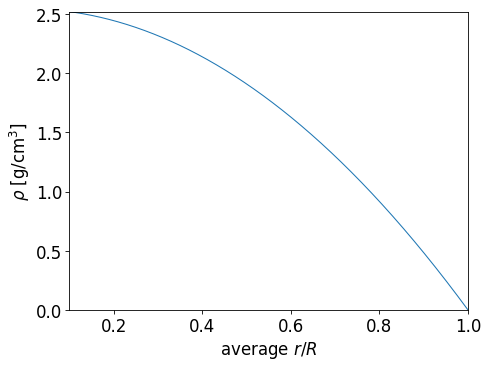

In [22]:
def dens_function(li):
    x = li/np.max(li)
    return 1-x**2

X.li         = radii
X.rhoi       = dens_function(radii)
X.m_rot_calc = (2*np.pi/period)**2*X.li[0]**3/(X.opts['G']*mass)

number_of_iterations = X.relax_to_HE()

X.plot_xy(0,2, dpi=75)
print('PyToF solutions:', ['J_'+str(2*i)  +' = '+"{:.4e}".format(X.Js[i]) for i in range(1,5)])

PyToF can apply an "atmosphere" model to a planet, i.e. a constraint on the outer part of the planet. To that end, we need supply PyToF with a function of the form:

In [23]:
def atmosphere(norm_radii, pressure, K=1e2):
    return (pressure/K)**(1/2)

The function describes the model we want to impose. It needs to have arguments of normalised average radius $l$ and of pressure $P$ in that order. It can have additional $\texttt{kwargs}$ as parameters. It needs to return a value that corresponds to a density $\rho$. Instead of calling $\texttt{relax\_to\_HE()}$ we now need to call $\texttt{relax\_to\_density()}$.

PyToF solutions: ['J_2 = 3.7624e-03', 'J_4 = -3.4991e-05', 'J_6 = 4.5867e-07', 'J_8 = -7.4452e-09']


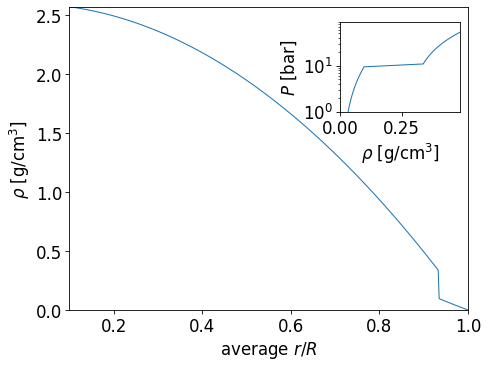

In [24]:
atmosphere_until = 1e6 #Pressure value in SI units that marks the end of the atmospheric model

X = ClassToF.ToF(N=N, M_init=mass, R_init=radius, Period=period, use_atmosphere=True, atmosphere=atmosphere, atmosphere_until=atmosphere_until)

X.li         = radii
X.rhoi       = dens_function(radii)
X.m_rot_calc = (2*np.pi/period)**2*X.li[0]**3/(X.opts['G']*mass)

number_of_iterations = X.relax_to_density()

X.plot_xy(0,2, extra_plot=True, extra_lim=[[0.0,0.49],[1e0,9e1]], dpi=75)
print('PyToF solutions:', ['J_'+str(2*i)  +' = '+"{:.4e}".format(X.Js[i]) for i in range(1,5)])

We see that at 10 bars the density and pressure jumps from the atmosphere model supplied by $\texttt{atmosphere()}$ to the density profile supplied by $\texttt{dens\_function()}$. For a barotrope, the analogous procedure would be:

PyToF solutions: ['J_2 = 2.8240e-03', 'J_4 = -2.1639e-05', 'J_6 = 2.4742e-07', 'J_8 = -3.6269e-09']


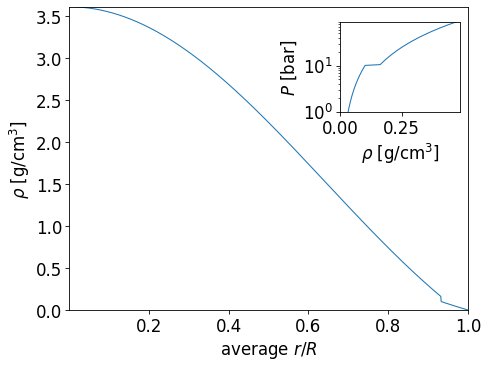

In [25]:
X = ClassToF.ToF(N=N, M_init=mass, R_init=radius, Period=period, use_atmosphere=True, atmosphere=atmosphere, atmosphere_until=atmosphere_until, baro_param_init=[1e1])

def barotrope(P, K): 
    return np.sqrt(P/K)

X.opts['baro_param_init'] = [1] #sets K=1
X.set_barotrope(barotrope)

number_of_iterations = X.relax_to_barotrope()

X.plot_xy(0,2, extra_plot=True, extra_lim=[[0.0,0.49],[1e0,9e1]], dpi=75)
print('PyToF solutions:', ['J_'+str(2*i)  +' = '+"{:.4e}".format(X.Js[i]) for i in range(1,5)])

## Chapter 4: Advanced functionalities II
Using the $\texttt{emcee}$ package ($\textit{Foreman-Mackey et al. 2013}$) to find solutions of Neptune

We initialize PyToF with the physical parameters of Neptune:

In [26]:
kwargs = {}

kwargs['N']      = 2**10
kwargs['G']      = 6.6743e-11
kwargs['M_init'] = 6836525.21*(1000)**3/kwargs['G'] #https://doi.org/10.1051/0004-6361/202244537
kwargs['R_init'] = 25225*1e3                        #https://iopscience.iop.org/article/10.1088/0004-6256/137/5/4322
kwargs['Period'] = 15.9663*60*60                    #https://www.sciencedirect.com/science/article/pii/S0019103511001783?via%3Dihub
kwargs['P0']     = 1e5

kwargs['Target_Js'] = [3401.655e-6, -33.294e-6] #https://doi.org/10.1051/0004-6361/202244537
kwargs['Sigma_Js']  = [   3.994e-6,  10.000e-6] #https://doi.org/10.1051/0004-6361/202244537

param = [3.21273277e+05, 2.86145345e+00] #https://arxiv.org/abs/2111.15494
def atmosphere(norm_radii, pressure, param=param):
    return (pressure/param[0])**(param[1]/(param[1]+1))

kwargs['use_atmosphere']   = True
kwargs['atmosphere_until'] = 1e7
kwargs['atmosphere']       = atmosphere

X = ClassToF.ToF(**kwargs)

We now look for 3-polytrope solutions of Neptune. $\texttt{emcee}$ is a Markov-Chain-Monte-Carlo algorithm that will look for the parameters characterizing the three polytropes such that the gravitational moments $\texttt{Target\_Js}$ are fitted within the uncertainties $\texttt{Sigma\_Js}$. We provide some initial parameter values that are roughly of the correct order of magnitude.

In [27]:
def barotrope(P, param=None):
    rho = np.zeros_like(P)
    rho[:round(param[0]) ] = (P[:round(param[0]) ] / param[2])**(param[5] / (param[5] + 1))
    rho[ round(param[0]):] = (P[ round(param[0]):] / param[3])**(param[6] / (param[6] + 1))
    rho[ round(param[1]):] = (P[ round(param[1]):] / param[4])**(param[7] / (param[7] + 1))
    return rho

baro_param_init = np.array([N/2, N/2,       #transition radii indeces
                            2e5, 2e5, 2e5,  #bulk moduli
                            0.5, 0.5, 0.5,  #exponents
                            N/50])*2        #atmospheric index (optional)

Additionally, we need to tell $\texttt{emcee}$ which values the parameters are allowed to take. This is done via the function $\texttt{check\_baro\_param}$. It returns 
 - True  if a parameter value is out of bounds
 - False if all paramater values are within the allowed bounds
 - The atmospheric index if $\texttt{check\_baro\_param}$ is called with $\texttt{give\_atmosphere\_index=True}$

The atmospheric index allows the algorithm to freely choose the end of the atmosphere model as long as its end is deeper in the planet than the value imposed by $\texttt{atmosphere\_until}$. To remove this freedom, simply replace

$\texttt{if give\_atmosphere\_index:}$ \
$\quad \texttt{return param[-1]}$

with

$\texttt{if give\_atmosphere\_index:}$ \
$\quad \texttt{return 0}$

in the function $\texttt{check\_baro\_param}$ in addition to leaving out the atmospheric index in the previously defined array $\texttt{baro\_param\_init}$.

In [28]:
def check_baro_param(param, give_atmosphere_index=False):

    if give_atmosphere_index:
        return param[-1]

    if   (param[0] < 0) or (param[0] > N) or (param[1]  < 0) or (param[1] > N):
        return True #transition radii out of bounds

    elif (param[2] < 0) or (param[3] < 0) or (param[4]  < 0):
        return True #negative bulk moduli

    elif (param[5] < 0) or (param[6] < 0) or (param[7]  < 0):
        return True #negative exponents

    elif (param[-1] < 0) or (param[-1] > param[0]):
        return True #atmosphere transition radius out of bounds

    else:
        return False

Now we give everything to the PyToF class.

In [29]:
X.opts['baro_param_init'] = baro_param_init
X.set_barotrope(barotrope)
X.set_check_param(check_baro_param)

The MCMC algorithm is started by calling $\texttt{X.run\_baro\_MC()}$ in the case of a barotrope model. We can tell it how many walkers ($\texttt{nwalkers}$) it should use and how many steps ($\texttt{steps}$) these should take. In addition, we can perform the calculation in a parallel manner by setting $\texttt{parallelize=True}$ and specifying the amount of cores ($\texttt{Ncores}$).

$\texttt{X.run\_baro\_MC()}$ returns two variables: $\texttt{state}$ is an array that contains $\texttt{nwalkers}$ many parameter arrays. Depending on the amount of $\texttt{steps}$ taken, some of them may represent a model of Neptune that fits the measured gravitational moments within the uncertainties. $\texttt{autocorr}$ is an array containing an autocorrelation time estimate $\tau$ sampled every 100 steps. See https://emcee.readthedocs.io/en/stable/tutorials/monitor/ for more details. For less than 100 steps taken, $\texttt{autocorr}$ will be empty.

In [30]:
nwalkers        = 20
steps           = 50
Ncores          = 8
parallelize     = True

state, autocorr = X.run_baro_MC(nwalkers, steps, Ncores=Ncores, parallelize=parallelize)

print('Shape of the MCMC state, equal to (nwalkers, len(baro_param_init)):       ', np.shape(state))
print('Shape of the autocorrelation time estimate array, sampled every 100 steps:', np.shape(autocorr))

Shape of the MCMC state, equal to (nwalkers, len(baro_param_init)):        (20, 9)
Shape of the autocorrelation time estimate array, sampled every 100 steps: (0,)


For larger calculations, it is advisable to use $\texttt{X.opts['verbosity']=1}$ or $\texttt{X.opts['verbosity']=2}$ to monitor the progress. $\texttt{X.classify\_and\_save\_state()}$ is a built-in function that both classifies the final MCMC state and can save the arrays $\texttt{X.li}$, $\texttt{X.rhoi}$, $\texttt{X.Pi}$ to a $\texttt{.txt}$ file. It also returns a lot of verbosity output, which we can see by adjusting the corresponding option.

In [31]:
X.opts['verbosity'] = 1
matches_observed_Js, rho_maxs = X.classify_and_save_state(state, 'baro')
X.opts['verbosity'] = 0

print(len(matches_observed_Js[matches_observed_Js]), 'walker(s) match(es) the gravity data.')

                                                                                                                  
Walker #0 yields a total cost of -3.31e-01.
              J2          J4     
My code: 3.39937e-03 -3.27902e-05 
Target:  3.40165e-03 -3.32940e-05 

                                                                                                                  
Walker #1 yields a total cost of -2.15e+02.
              J2          J4     
My code: 3.45993e-03 -4.67736e-05 
Target:  3.40165e-03 -3.32940e-05 

                                                                                                                  
Walker #2 yields a total cost of -3.47e+01.
              J2          J4     
My code: 3.37905e-03 -4.95482e-05 
Target:  3.40165e-03 -3.32940e-05 

                                                                                                                  
Walker #3 yields a total cost of -4.20e+01.
              J2          J4     
My code: 3.3759

The total cost is calculated as $\sum_{n} \frac{\left( J_{2n,\text{PyToF}} - J_{2n,\text{data}} \right)^2}{\left( \sigma_{J_{2n},\text{data}} \right)^2}$. In order to actually save the afforementioned arrays, we would need to call:

In [32]:
#matches_observed_Js, rho_maxs = X.classify_and_save_state(state, 'baro', what_save='all', log_CGS_units=True, path_name=os.getcwd(), file_name='sol_li_logRhoi_logPi')

Passing $\texttt{log\_CGS\_units=True}$ means that the values in the saved files are stored using CGS units instead of SI units. Additionally, $\log_{10}$ is applied to the densities and pressures. The default $\texttt{log\_CGS\_units=False}$ leads to no $\log_{10}$ applications and SI units being used. Allowed values of $\texttt{what\_save}$ are:

 - $\texttt{'all'}$: the radii, densities and pressures of all walkers are saved
 - $\texttt{'good'}$: the radii, densities and pressures of walkers matching the gravity data are saved
 - $\texttt{'none'}$: default, no files are saved

A simple example using a density profile with $\rho(l_\text{max})=0$ instead of a barotrope employing $\texttt{X.run\_dens\_MC()}$:

In [33]:
def dens_function(li, param=None):
    x = li/np.max(li)
    return np.sum(param) - (param[0]*x + param[1]*x**2 + param[2]*x**3 + param[3]*x**4 + param[4]*x**5)

def check_dens_param(param, give_atmosphere_index=False):

    if give_atmosphere_index:
        return param[-1]

    else:
        return False

X.opts['dens_param_init'] = [1e-2]*5
X.set_density_function(dens_function)
X.set_check_param(check_dens_param)

state_dens, autocorr_dens = X.run_dens_MC(nwalkers, steps, Ncores=Ncores, parallelize=parallelize)

matches_observed_Js_dens, rho_maxs_dens = X.classify_and_save_state(state_dens, 'dens')

print(len(matches_observed_Js_dens[matches_observed_Js_dens]), 'walker(s) match(es) the gravity data.')

/tmp/ipykernel_37940/4017081651.py:15: RuntimeWarning: invalid value encountered in power
  return (pressure/param[0])**(param[1]/(param[1]+1))
/home/lumo/Code/PyToF_dev/PyToF/AlgoToF.py:405: RuntimeWarning: divide by zero encountered in divide
  new_sn0 = np.array((A2/S0, A4/S0, A6/S0, A8/S0)).T
/home/lumo/Code/PyToF_dev/PyToF/AlgoToF.py:558: RuntimeWarning: invalid value encountered in subtract
  new_s0 = -0.2*s2**2 - (2*s2**3)/105. - (2*s2**2*s4)/35. - s4**2/9.
/home/lumo/Code/PyToF_dev/PyToF/AlgoToF.py:161: RuntimeWarning: invalid value encountered in add
  f2  = (3*s2)/5. + (12*s2**2)/35. + (6*s2**3)/175. - (184*s2**4)/1925. + (24*s2*s4)/35. + (216*s2**2*s4)/385. + (40*s4**2)/231.
/home/lumo/Code/PyToF_dev/PyToF/AlgoToF.py:163: RuntimeWarning: invalid value encountered in add
  f4  = (18*s2**2)/35. + (36*s2**3)/77. + (486*s2**4)/5005. + s4/3. + (40*s2*s4)/77. + (6943*s2**2*s4)/5005. + (162*s4**2)/1001. + (90*s2*s6)/143.
/home/lumo/Code/PyToF_dev/PyToF/AlgoToF.py:165: RuntimeWarnin

7 walker(s) match(es) the gravity data.


## Chapter 5: Built-in plotting functionalities II
Plotting Neptune solution candidates according to their agreement with physical data

PyToF provides the function $\texttt{X.plot\_state\_xy()}$ for plotting. The default plotting options are listed in the function $\texttt{default\_opts()}$ in the file $\texttt{PlotToF.py}$. The function $\texttt{X.plot\_state\_xy()}$ needs two integer numbers $x,y \in \{0,1,2,3\}$ as arguments that correspond to 

 - 0: Average normalized radii of the spheroid shells
 - 1: Mass enclosed by the spheroid shells
 - 2: Densities of the spheroid shells
 - 3: Pressures of the spheroid shells

Additionally, $\texttt{X.plot\_state\_xy()}$ needs to be supplied with

 - An array $\texttt{state}$ of shape (number of candidates, $\texttt{len(baro\_param\_init)}$ or $\texttt{len(dens\_param\_init)}$), see chapter 4
 - A string $\texttt{what\_model} \in \{ \texttt{'baro'}, \texttt{'dens'} \}$ specyfing if the parameters correspond to a barotrope or density model, see chapter 4

Therefore to plot e.g. the densities of the spheroid shells as a function of the average normalized radii of the spheroid shells of multiple candidate density solutions, we call:

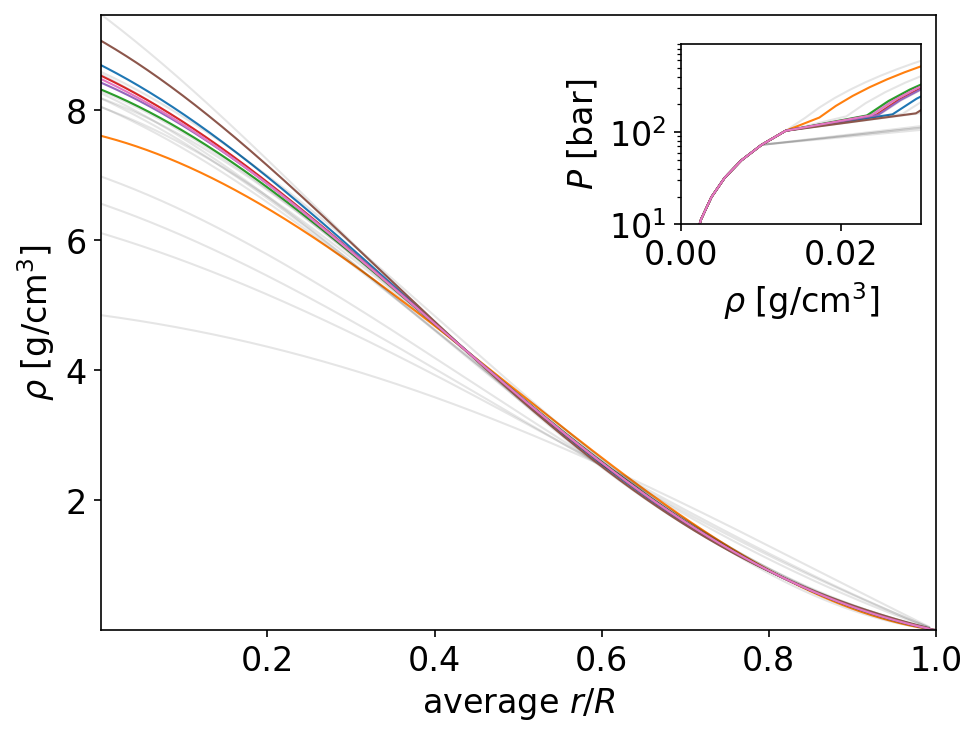

In [34]:
X.plot_state_xy(0, 2, state_dens, 'dens', 
                extra_plot=True, extra_lim=[[0.0,0.03],[1e1,9e2]])

The walkers that do not match the gravity data are fainted out. The fainted out color can be changed via the keyword argument $\texttt{wrong\_color}$, which by default is $\texttt{wrong\_color=(0.0, 0.0, 0.0, 0.1)}$. Other custom plotting options:

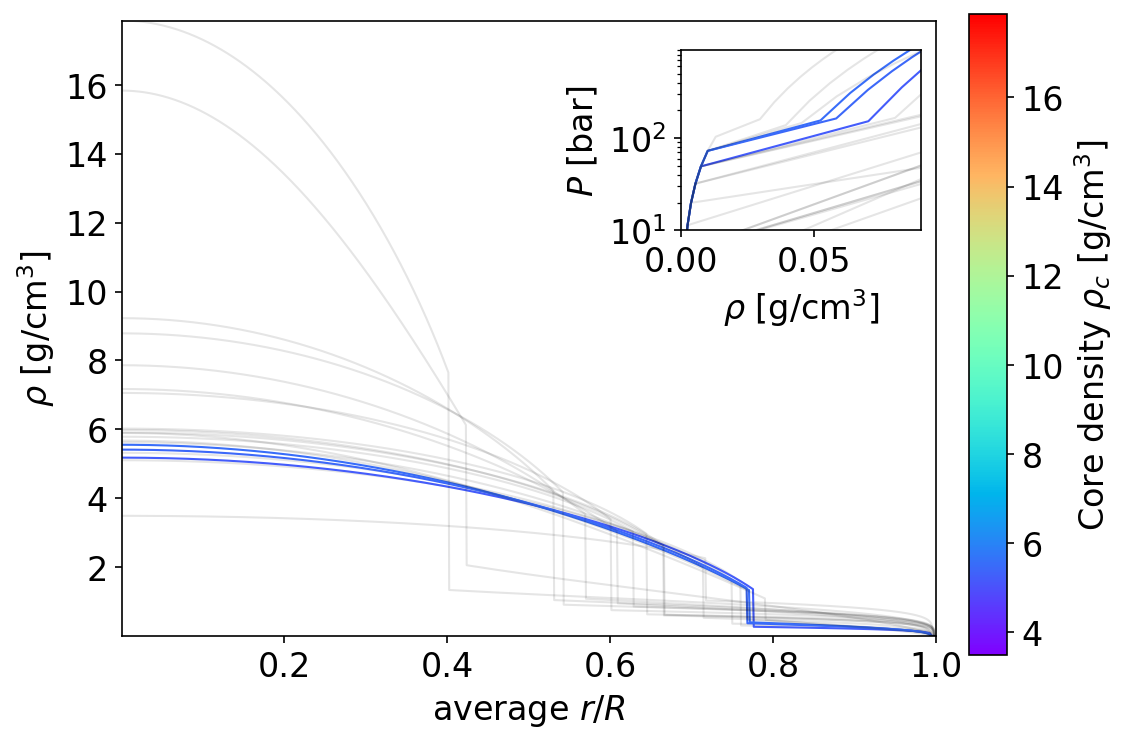

In [35]:
X.plot_state_xy(0, 2, state, 'baro',
                rho_maxs=rho_maxs, state_cmap='rainbow', len_color_bar=0.04,
                extra_plot=True, extra_lim=[[0.0,0.09],[1e1,9e2]])

$\texttt{X.plot\_state\_corr\_xy()}$ is called very similar to $\texttt{X.plot\_state\_xy()}$, but the integers $\texttt{x}$ and $\texttt{y}$ now indicate the gravitational moments $J_n$ or the values $b_i$ in the $\texttt{state}$ array. $\texttt{X.plot\_state\_corr\_xy()}$ depicts the correlation between the two specified parameters in addition to their corresponding histograms.

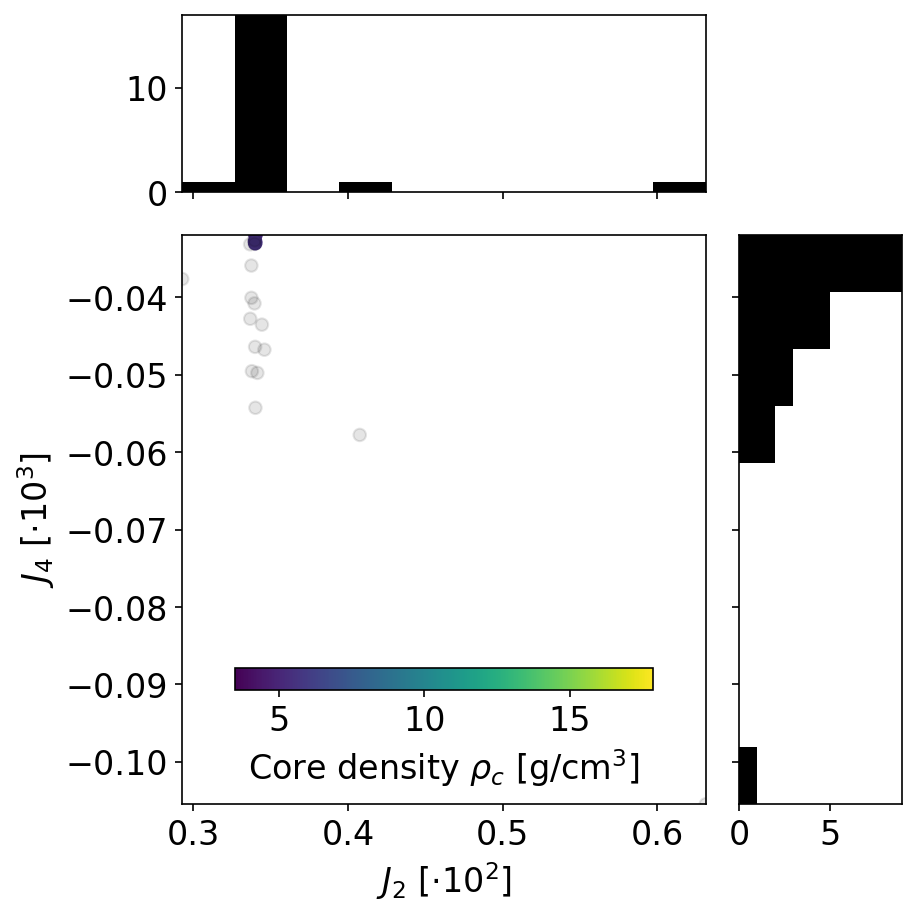

In [36]:
X.plot_state_corr_xy(1, 2, state, 'baro', rho_maxs=rho_maxs)

One can use $\texttt{uni\_color=True}$ to make sure that the scatter plot uses but a unique color for physical solutions. Setting $\texttt{legend=True}$ reveals the mean $\mu$ and standard deviation $\sigma$ in the histograms, and the calculated Spearman correlation coefficient $\rho$ with associated $p$-value in the scatter plot. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html for further information.

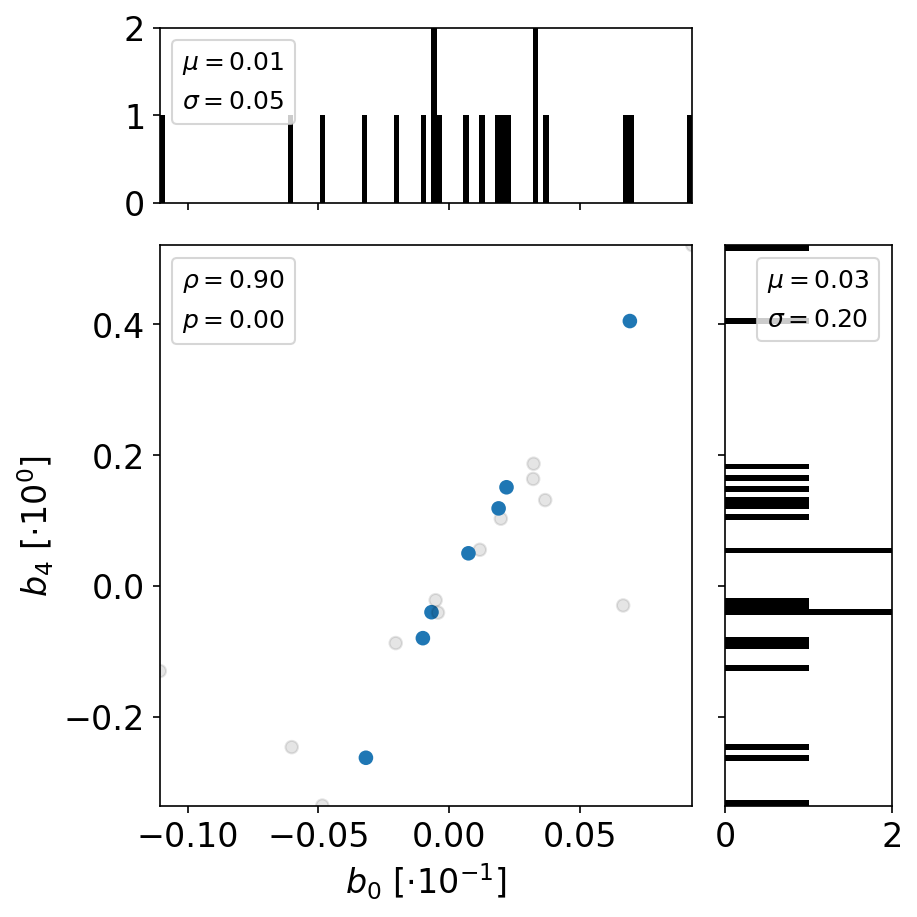

In [37]:
X.plot_state_corr_xy(5, 9, state_dens, 'dens', uni_color=True, legend=True, bins=100)